In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("vehicles.csv")

C:\Users\kapid\AppData\Local\Temp\ipykernel_20792\3059042137.py:1: DtypeWarning: Columns (8,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,184,186) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vehicles.csv")


In [3]:
df.shape

(236188, 189)

In [4]:
za_dropanje = df.loc[:,"priceHistory[0].price":"priceHistory[53].timestamp"].columns

In [5]:
df.drop(za_dropanje, axis=1, inplace=True)

In [6]:
df.shape

(236188, 27)

In [7]:
df.isnull().sum()

_id                      0
createdAt                0
displacement             4
doors                   17
fuel                     3
kilowatts            13794
location                 0
manufacturer             0
mileage                  2
model                    0
price                    0
title                    0
updatedAt                0
year                    17
color                80241
cruiseControl       121561
drivetrain           80476
emissionStandard    110667
parkingSensors      130130
rimSize              95241
transmission         52625
type                 95259
externalId               0
id                       0
airCondition        164087
navigation          154953
registration        127497
dtype: int64

In [8]:
df.dropna(subset=["displacement","doors","fuel","kilowatts","mileage","year","transmission"], inplace=True)

In [9]:
df.drop(["id", "externalId", "parkingSensors", "_id", "createdAt"], axis=1, inplace=True)

In [10]:
df.isnull().sum()

displacement             0
doors                    0
fuel                     0
kilowatts                0
location                 0
manufacturer             0
mileage                  0
model                    0
price                    0
title                    0
updatedAt                0
year                     0
color                42796
cruiseControl        76453
drivetrain           40996
emissionStandard     66485
rimSize              54911
transmission             0
type                 50912
airCondition        117598
navigation          104260
registration         87657
dtype: int64

In [11]:
df["mileage"] = df["mileage"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175090 entries, 0 to 236187
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   displacement      175090 non-null  float64
 1   doors             175090 non-null  object 
 2   fuel              175090 non-null  object 
 3   kilowatts         175090 non-null  float64
 4   location          175090 non-null  object 
 5   manufacturer      175090 non-null  object 
 6   mileage           175090 non-null  float64
 7   model             175090 non-null  object 
 8   price             175090 non-null  int64  
 9   title             175090 non-null  object 
 10  updatedAt         175090 non-null  object 
 11  year              175090 non-null  float64
 12  color             132294 non-null  object 
 13  cruiseControl     98637 non-null   object 
 14  drivetrain        134094 non-null  object 
 15  emissionStandard  108605 non-null  object 
 16  rimSize           120179 

In [13]:
df.describe().round(2)

,displacement,kilowatts,mileage,price,year,rimSize
count,175090.00,175090.00,1.750900e+05,175090.00,175090.00,120179.00
mean,1.90,98.01,6.345943e+28,19519.99,2009.52,16.53
std,0.51,41.52,2.655381e+31,32626.29,6.61,1.49
min,0.00,0.00,0.000000e+00,1.00,1950.00,13.00
25%,1.60,77.00,1.800000e+05,7300.00,2005.00,16.00
50%,1.90,88.00,2.350000e+05,13399.00,2010.00,16.00
75%,2.00,110.00,2.800000e+05,23199.00,2014.00,17.00
max,7.50,3500.00,1.111111e+34,8128655.00,2024.00,23.00


In [14]:
indeksi_drop_kilometraza = df.index[(df['mileage'] > 1_000_000) | (df['mileage'] < 0)].to_list()
df.drop(indeksi_drop_kilometraza, inplace=True)

In [15]:
indeksi_drop_cijena = df.index[(df['price'] > 8_000_000) | (df['price'] < 500)].to_list()
df.drop(indeksi_drop_cijena, inplace=True)

In [16]:
most_common_rim_size = df["rimSize"].mode()[0]
df["rimSize"] = df["rimSize"].fillna(most_common_rim_size)

most_common_emission_standard = df["emissionStandard"].mode()[0]
df["emissionStandard"] = df["emissionStandard"].fillna(most_common_emission_standard)

In [17]:
df["airCondition"]= df["airCondition"].fillna("FALSE")
df["navigation"] = df["navigation"].fillna("FALSE")
df["registration"] = df["registration"].fillna("FALSE")
df["cruiseControl"] = df["cruiseControl"].fillna("FALSE")
df["color"] = df["color"].bfill()
df["drivetrain"] = df["drivetrain"].bfill()
df["emissionStandard"] = df["emissionStandard"].bfill()
df["type"] = df["type"].fillna("unavailable")

In [42]:
df_volkswagen = df[df["manufacturer"]=="Volkswagen"]
df_volkswagen.shape

(50577, 22)

In [43]:
df_audi = df[df["manufacturer"]=="Audi"]
df_audi.shape

(20497, 22)

In [44]:
df_mercedes_benz = df[df["manufacturer"]=="Mercedes-Benz"]
df_mercedes_benz.shape

(13360, 22)

In [18]:
df_skoda = df[df["manufacturer"]=="Škoda"]

In [45]:
df_all = df[df["manufacturer"].isin(["Volkswagen", "Audi", "Mercedes-Benz"])]
df_all


,displacement,doors,fuel,kilowatts,location,manufacturer,mileage,model,price,title,...,color,cruiseControl,drivetrain,emissionStandard,rimSize,transmission,type,airCondition,navigation,registration
171,1.8,4/5,Benzin,110.0,Ključ,Audi,400.0,A4,3700,Audi A4 Reg 12. mj sa Policom,...,Siva,True,Prednji,Euro 4,15.0,Manuelni,Karavan,True,FALSE,True
172,1.6,2/3,Plin,74.0,Sarajevo - Centar,Audi,270000.0,A3,1950,Audi A3 1.6 sekvnet plin,...,Siva,FALSE,Prednji,Euro 5,15.0,Manuelni,unavailable,FALSE,FALSE,FALSE
173,2.2,4/5,Plin,100.0,Modriča,Audi,348000.0,100,5000,Audi 100 Quattro 4x4 2.2 benz-plin,...,Siva,FALSE,Sva četiri,Euro 1,15.0,Manuelni,unavailable,True,True,FALSE
177,2.5,4/5,Dizel,110.0,Banja Luka,Audi,362000.0,A6,4800,Audi A6 1999,...,Plava,FALSE,Prednji,Euro 5,16.0,Manuelni,Limuzina,True,FALSE,True
183,2.0,2/3,Dizel,125.0,Sarajevo - Novi Grad,Audi,325000.0,A3,10500,Audi A3 2.0 TDI 2008. god 125 kw,...,Siva,FALSE,Prednji,Euro 4,18.0,Manuelni,Malo auto,True,FALSE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236179,2.0,4/5,Dizel,100.0,Konjic,Audi,254400.0,A3,15000,Audi A3 2.0 TDI 100 KW 06/2011 Sportback,...,Smeđa,True,Prednji,Euro 5,16.0,Manuelni,Limuzina,FALSE,True,FALSE
236182,2.0,4/5,Dizel,103.0,Busovača,Volkswagen,271000.0,Passat,12000,Volkswagen Passat 2010 Tek registrovan,...,Crna,True,Prednji,Euro 5,16.0,Automatik,Karavan,FALSE,FALSE,True
236183,1.6,4/5,Dizel,77.0,Tešanj,Volkswagen,262035.0,Jetta,14600,Volkswagen Jetta,...,Plava,FALSE,Prednji,Euro 5,16.0,Manuelni,unavailable,FALSE,FALSE,FALSE
236186,3.0,4/5,Dizel,165.0,Sarajevo - Novi Grad,Audi,308000.0,A6,12400,Audi A6 3.0 QUATTRO 3x S LINE FUL PAKET-tek re...,...,Siva,True,Sva četiri,Euro 3,20.0,Automatik,Limuzina,FALSE,True,True


In [46]:
df_all_numeric = df_all[['displacement', 'kilowatts', 'mileage', 'price', 'year', 'rimSize', 'manufacturer']]
df_all_numeric

,displacement,kilowatts,mileage,price,year,rimSize,manufacturer
171,1.8,110.0,400.0,3700,2001.0,15.0,Audi
172,1.6,74.0,270000.0,1950,1996.0,15.0,Audi
173,2.2,100.0,348000.0,5000,1983.0,15.0,Audi
177,2.5,110.0,362000.0,4800,1999.0,16.0,Audi
183,2.0,125.0,325000.0,10500,2008.0,18.0,Audi
...,...,...,...,...,...,...,...
236179,2.0,100.0,254400.0,15000,2011.0,16.0,Audi
236182,2.0,103.0,271000.0,12000,2010.0,16.0,Volkswagen
236183,1.6,77.0,262035.0,14600,2012.0,16.0,Volkswagen
236186,3.0,165.0,308000.0,12400,2005.0,20.0,Audi


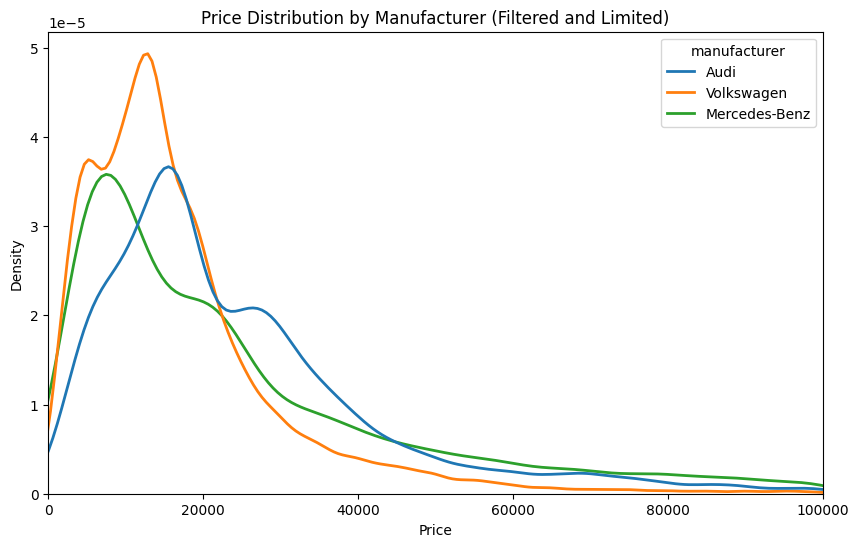

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (Assuming you have already prepared df_all_numeric)
# df_all_numeric = your_dataframe

# Filter the data to remove extreme values
filtered_df = df_all_numeric[df_all_numeric['price'] <= 100000]

plt.figure(figsize=(10, 6))

# Plot KDE for each manufacturer
sns.kdeplot(data=filtered_df, x='price', hue='manufacturer', common_norm=False, linewidth=2)

# Further limit the x-axis to focus on the most relevant range
plt.xlim(0, 100000)

plt.title('Price Distribution by Manufacturer (Filtered and Limited)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [48]:
import numpy as np
from scipy.stats import gaussian_kde

# Assuming df_all_numeric is your DataFrame with filtered prices <= 100,000
# Filter the data for each manufacturer
volkswagen_data = filtered_df[filtered_df['manufacturer'] == 'Volkswagen']['price']
audi_data = filtered_df[filtered_df['manufacturer'] == 'Audi']['price']
mercedes_data = filtered_df[filtered_df['manufacturer'] == 'Mercedes-Benz']['price']

# Fit KDE for each manufacturer's price data
kde_volkswagen = gaussian_kde(volkswagen_data)
kde_audi = gaussian_kde(audi_data)
kde_mercedes = gaussian_kde(mercedes_data)

# Define the price points of interest
price_points = np.arange(5000, 100001, 5000)

# Scale factor based on the graph's y-axis (adjust as needed)
scale_factor = 1e5  # Example scaling factor to match the graph

# Initialize the list to store the formatted data
formatted_data = []

# Evaluate the KDE at each price point and store the results in the desired format
for x_point in price_points:
    y_point_volkswagen = kde_volkswagen(x_point)[0] * scale_factor
    y_point_audi = kde_audi(x_point)[0] * scale_factor
    y_point_mercedes = kde_mercedes(x_point)[0] * scale_factor
    
    # Create a dictionary for the current price point with rounded values to 2 decimals
    data_entry = {
        "label": str(x_point),
        "Volkswagen": round(y_point_volkswagen, 2),
        "Audi": round(y_point_audi, 2),
        "Mercedes-Benz": round(y_point_mercedes, 2)
    }
    
    # Append the dictionary to the list
    formatted_data.append(data_entry)

# Print the formatted data
for entry in formatted_data:
    print(entry)



{'label': '5000', 'Volkswagen': np.float64(3.73), 'Audi': np.float64(1.93), 'Mercedes-Benz': np.float64(3.21)}
{'label': '10000', 'Volkswagen': np.float64(4.27), 'Audi': np.float64(2.72), 'Mercedes-Benz': np.float64(3.33)}
{'label': '15000', 'Volkswagen': np.float64(4.17), 'Audi': np.float64(3.65), 'Mercedes-Benz': np.float64(2.39)}
{'label': '20000', 'Volkswagen': np.float64(2.76), 'Audi': np.float64(2.59), 'Mercedes-Benz': np.float64(2.15)}
{'label': '25000', 'Volkswagen': np.float64(1.46), 'Audi': np.float64(2.06), 'Mercedes-Benz': np.float64(1.68)}
{'label': '30000', 'Volkswagen': np.float64(0.86), 'Audi': np.float64(1.86), 'Mercedes-Benz': np.float64(1.11)}
{'label': '35000', 'Volkswagen': np.float64(0.56), 'Audi': np.float64(1.29), 'Mercedes-Benz': np.float64(0.89)}
{'label': '40000', 'Volkswagen': np.float64(0.4), 'Audi': np.float64(0.87), 'Mercedes-Benz': np.float64(0.72)}
{'label': '45000', 'Volkswagen': np.float64(0.31), 'Audi': np.float64(0.57), 'Mercedes-Benz': np.float64(0

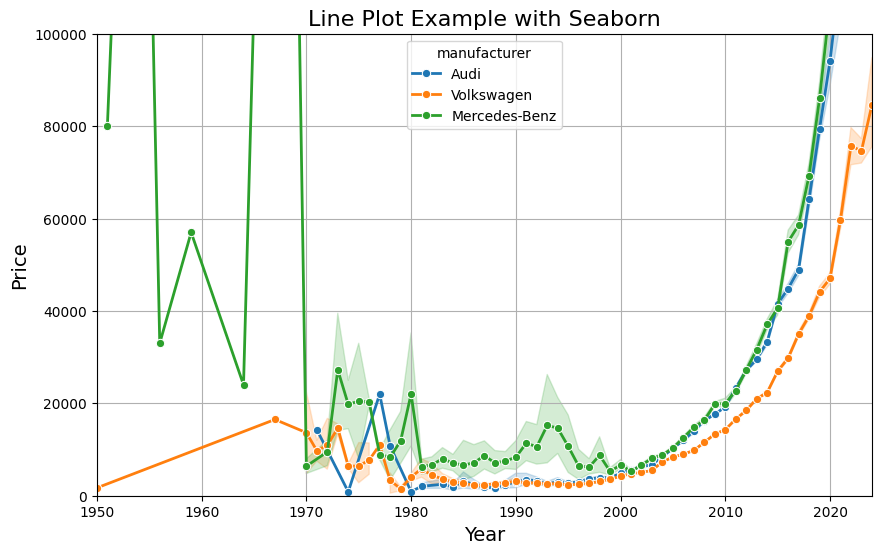

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a simple dataset
df = df_all_numeric  # Assuming df_all_numeric is already defined
x = df["year"].values
y = df["price"].values

# Step 2: Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=x, y=y, hue='manufacturer', marker='o', lw=2)

# Step 3: Customize the plot
plt.title('Line Plot Example with Seaborn', fontsize=16)
plt.xlabel('Year', fontsize=14)  # Updated the x-axis label for clarity
plt.ylabel('Price', fontsize=14)  # Updated the y-axis label for clarity
plt.grid(True)

# Step 4: Set y-axis limit
plt.ylim(0, 100000)  # Limit y-axis values from 0 to 100,000

# Step 5: Set x-axis limit
plt.xlim(1950, df['year'].max())  # Limit x-axis from 1970 to the maximum year in the dataset

# Step 6: Show the plot
plt.show()



<Axes: >

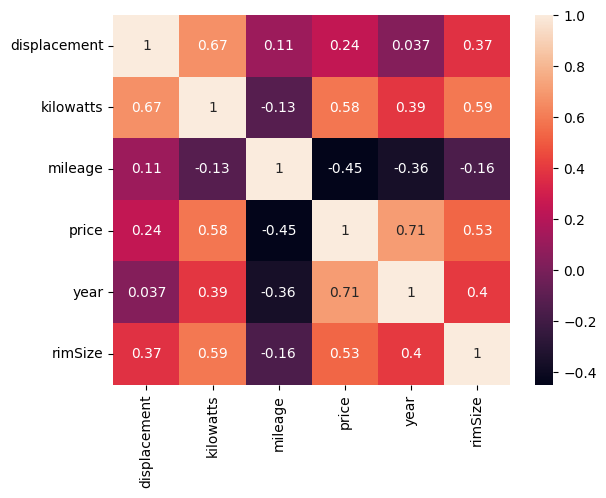

In [205]:
numericke_vrijednosti = df_volkswagen.select_dtypes(include=[np.number])
korelacija = numericke_vrijednosti.corr()
sns.heatmap(data=korelacija, annot=True)

<Axes: >

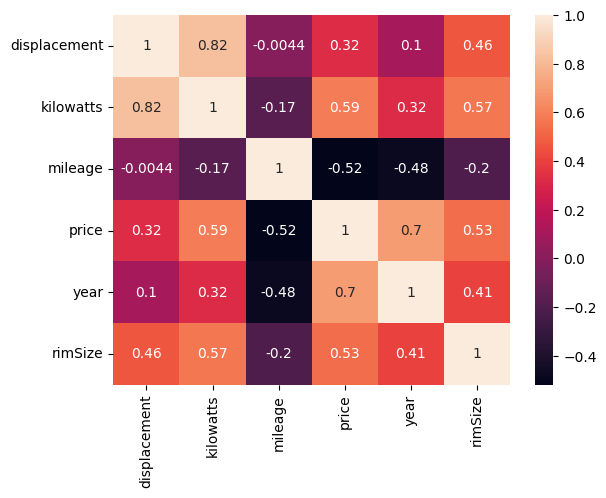

In [369]:
numericke_vrijednosti = df_audi.select_dtypes(include=[np.number])
korelacija = numericke_vrijednosti.corr()
sns.heatmap(data=korelacija, annot=True)

<Axes: >

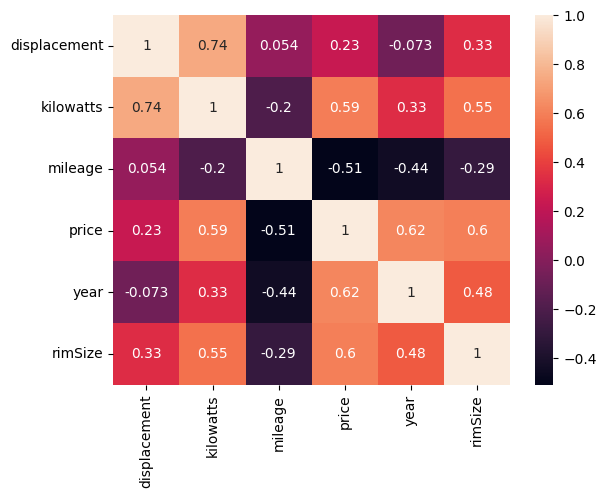

In [470]:
numericke_vrijednosti = df_mercedes_benz.select_dtypes(include=[np.number])
korelacija = numericke_vrijednosti.corr()
sns.heatmap(data=korelacija, annot=True)

In [57]:
df_volkswagen.describe().round(2)

,displacement,kilowatts,mileage,price,year,rimSize
count,50577.00,50577.00,50577.00,50577.00,50577.00,50577.00
mean,1.82,89.08,235771.01,17226.55,2009.04,16.18
std,0.30,26.36,90169.67,15353.06,6.79,1.02
min,0.00,20.00,0.00,500.00,1950.00,13.00
25%,1.60,77.00,200000.00,8400.00,2006.00,16.00
50%,1.90,81.00,246000.00,13700.00,2010.00,16.00
75%,2.00,103.00,285000.00,20999.00,2013.00,16.00
max,5.00,300.00,1000000.00,654321.00,2024.00,22.00


In [58]:
df_audi.describe().round(2)

,displacement,kilowatts,mileage,price,year,rimSize
count,20497.00,20497.00,20497.00,20497.00,20497.00,20497.00
mean,2.25,128.38,234883.04,27819.49,2010.13,17.15
std,0.53,44.39,88329.65,27994.26,5.79,1.47
min,0.60,1.00,0.00,500.00,1971.00,13.00
25%,2.00,103.00,200000.00,12750.00,2007.00,16.00
50%,2.00,120.00,248000.00,19600.00,2010.00,17.00
75%,2.70,150.00,287650.00,32900.00,2013.00,18.00
max,5.20,441.00,999999.00,338226.00,2024.00,23.00


In [59]:
df_mercedes_benz.describe().round(2)

,displacement,kilowatts,mileage,price,year,rimSize
count,13360.00,13360.00,13360.00,13360.00,13360.00,13360.00
mean,2.34,124.25,242664.13,29982.46,2008.78,16.82
std,0.58,59.63,110061.39,36467.86,7.53,1.38
min,0.60,0.00,0.00,500.00,1951.00,13.00
25%,2.00,90.00,183033.75,8687.50,2004.00,16.00
50%,2.20,110.00,254000.00,18500.00,2010.00,16.00
75%,2.70,145.00,306000.00,36000.00,2014.00,17.00
max,7.30,3500.00,1000000.00,600000.00,2024.00,23.00


In [60]:
df_volkswagen.shape

(50577, 22)

In [61]:
df_mercedes_benz.isnull().sum()

displacement        0
doors               0
fuel                0
kilowatts           0
location            0
manufacturer        0
mileage             0
model               0
price               0
title               0
updatedAt           0
year                0
color               0
cruiseControl       0
drivetrain          0
emissionStandard    0
rimSize             0
transmission        0
type                0
airCondition        0
navigation          0
registration        0
dtype: int64

In [ ]:
##df_mercedes_benz.to_csv("mercedes_cleaned.csv", sep=',', index=False, encoding='utf-8')

In [62]:
df_all_cleaned = pd.read_csv("all_cleaned.csv")


In [63]:
df_all_numeric = df_all_cleaned[['displacement', 'kilowatts', 'mileage', 'price', 'year', 'rimSize', 'manufacturer']]
df_all_numeric[(df_all_numeric["manufacturer"] == "Mercedes-Benz") & (df_all_numeric["year"] == 2024)]




,displacement,kilowatts,mileage,price,year,rimSize,manufacturer
77482,2.0,110.0,0.0,101006,2024.0,18.0,Mercedes-Benz
80988,2.0,110.0,5.0,103990,2024.0,18.0,Mercedes-Benz
81278,2.2,145.0,9000.0,142000,2024.0,18.0,Mercedes-Benz
81495,3.0,270.0,7800.0,243900,2024.0,21.0,Mercedes-Benz
81786,3.0,270.0,0.0,305990,2024.0,21.0,Mercedes-Benz
82420,2.2,120.0,0.0,159529,2024.0,18.0,Mercedes-Benz
82676,2.0,180.0,0.0,195952,2024.0,16.0,Mercedes-Benz
82677,2.0,160.0,820.0,150000,2024.0,16.0,Mercedes-Benz
83290,3.0,184.0,0.0,319000,2024.0,16.0,Mercedes-Benz


In [490]:
df_mercedes_benz[(df_mercedes_benz['price'] >= 430000)][['displacement', 'kilowatts', 'mileage', 'price', 'year', 'rimSize', 'manufacturer', 'type', 'model']]

,displacement,kilowatts,mileage,price,year,rimSize,manufacturer,type,model


In [489]:
indeksi_drop = df_mercedes_benz.index[(df_mercedes_benz['price'] >= 430000)].to_list()
df_mercedes_benz.drop(indeksi_drop, inplace=True)

In [491]:
df_mercedes_benz.describe().round(2)

,displacement,kilowatts,mileage,price,year,rimSize
count,13346.00,13346.00,13346.00,13346.00,13346.00,13346.00
mean,2.34,123.91,242797.19,29868.86,2008.79,16.82
std,0.58,49.99,109988.30,35777.67,7.52,1.38
min,0.60,34.00,0.00,500.00,1951.00,13.00
25%,2.00,90.00,183762.25,8650.00,2004.00,16.00
50%,2.20,110.00,254000.00,18500.00,2010.00,16.00
75%,2.70,145.00,306000.00,36000.00,2014.00,17.00
max,7.30,999.00,1000000.00,429800.00,2024.00,23.00


In [505]:
df_mercedes_benz.shape

(13346, 22)

In [494]:
df_mercedes_benz.nlargest(10, 'price')["price"]

197824    429800
197836    425000
197835    419000
197830    415000
197834    385000
219457    339800
197832    330000
219458    319000
197833    309900
197826    305990
Name: price, dtype: int64

In [500]:
combined_df = pd.concat([df_volkswagen, df_audi, df_mercedes_benz], ignore_index=True)

In [501]:
combined_df.shape

(84403, 22)

In [502]:
combined_df.to_csv("all_cleaned.csv", sep=',', index=False, encoding='utf-8')

In [503]:
combined_df_numeric = combined_df[['displacement', 'kilowatts', 'mileage', 'price', 'year', 'rimSize', 'manufacturer']]

In [504]:
combined_df_numeric.to_csv("all_cleaned_numeric.csv", sep=',', index=False, encoding='utf-8')

In [20]:
df_skoda.to_csv("skoda_notcleaned.csv", sep=',', index=False, encoding='utf-8')

In [23]:
df_skoda_numeric = df_skoda[['displacement', 'kilowatts', 'mileage', 'price', 'year', 'rimSize']]

In [27]:
df_skoda_numeric.to_csv("skoda_notcleaned_numeric.csv", sep=',', index=False, encoding='utf-8')